In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='poster')

In [2]:
with open('results/01_compare_baseline_models.pickle', 'rb') as f:
    svc_results, log_reg_results, random_forest_results, evaluated_datasets, times = pickle.load(f)
    
database = pd.read_json("database.json").T

In [3]:
svc_df = pd.DataFrame(svc_results, columns=['auroc_fold_1', 'auroc_fold_2', 'auroc_fold_3', 'auroc_fold_4'], index=evaluated_datasets)
svc_df['model'] = 'SVC'
log_reg_df = pd.DataFrame(log_reg_results, columns=['auroc_fold_1', 'auroc_fold_2', 'auroc_fold_3', 'auroc_fold_4'], index=evaluated_datasets)
log_reg_df['model'] = 'Logistic Regression'
random_forest_df = pd.DataFrame(random_forest_results, columns=['auroc_fold_1', 'auroc_fold_2', 'auroc_fold_3', 'auroc_fold_4'], index=evaluated_datasets)
random_forest_df['model'] = 'Random Forest'

In [4]:
results_df = pd.concat([svc_df, log_reg_df, random_forest_df], axis=0)
results_df.columns = ['auroc_split_1', 'auroc_split_2', 'auroc_split_3','auroc_split_4', 'model']
results_df = results_df.join(database, how='left')
results_df['mean_auroc'] = results_df[['auroc_split_1', 'auroc_split_2', 'auroc_split_3','auroc_split_4']].mean(1)
results_df['min_auroc'] = results_df[['auroc_split_1', 'auroc_split_2', 'auroc_split_3','auroc_split_4']].min(1)
results_df['max_auroc'] = results_df[['auroc_split_1', 'auroc_split_2', 'auroc_split_3','auroc_split_4']].max(1)
results_df['std_auroc'] = results_df[['auroc_split_1', 'auroc_split_2', 'auroc_split_3','auroc_split_4']].std(1)

In [5]:
results_df

,auroc_split_1,auroc_split_2,auroc_split_3,auroc_split_4,model,nrow,ncol,mv,ir,class,mean_auroc,min_auroc,max_auroc,std_auroc
abalone-11class,0.743882,0.760574,0.752081,0.756256,SVC,3842.0,9.0,0.0,0.179334,11.0,0.753198,0.743882,0.760574,0.007113
abalone-11class,0.748839,0.767669,0.757547,0.759092,Logistic Regression,3842.0,9.0,0.0,0.179334,11.0,0.758287,0.748839,0.767669,0.007713
abalone-11class,0.752479,0.761187,0.759666,0.754425,Random Forest,3842.0,9.0,0.0,0.179334,11.0,0.756939,0.752479,0.761187,0.004151
abalone-3class,0.834914,0.838891,0.829677,0.829764,SVC,4177.0,9.0,0.0,0.346421,3.0,0.833312,0.829677,0.838891,0.004453
abalone-3class,0.835002,0.837970,0.830778,0.829396,Logistic Regression,4177.0,9.0,0.0,0.346421,3.0,0.833286,0.829396,0.837970,0.003929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wine-quality-white-5class,0.702477,0.734840,0.713156,0.709066,Logistic Regression,4873.0,12.0,0.0,0.451057,5.0,0.714885,0.702477,0.734840,0.014012
wine-quality-white-5class,0.852106,0.858091,0.847913,0.857360,Random Forest,4873.0,12.0,0.0,0.451057,5.0,0.853867,0.847913,0.858091,0.004782
yeast-4class,0.797468,0.813575,0.814512,0.816603,SVC,1299.0,9.0,0.0,0.356428,4.0,0.810540,0.797468,0.816603,0.008806
yeast-4class,0.790734,0.808664,0.811647,0.808793,Logistic Regression,1299.0,9.0,0.0,0.356428,4.0,0.804959,0.790734,0.811647,0.009583


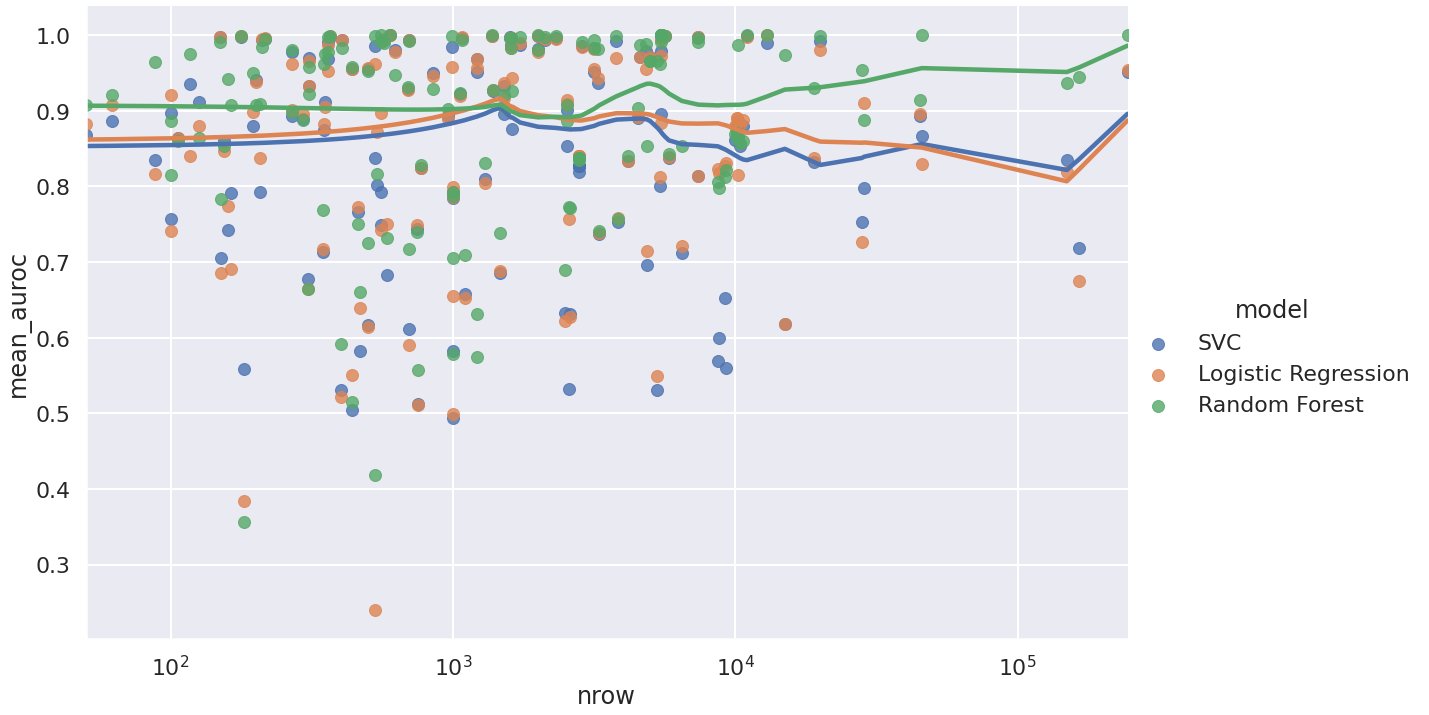

In [6]:
g = sns.lmplot(
    data=results_df,
    x="nrow", y="mean_auroc",
    hue="model",
    lowess=True,
    height=10, aspect=1.6
)
g.set(xscale="log")

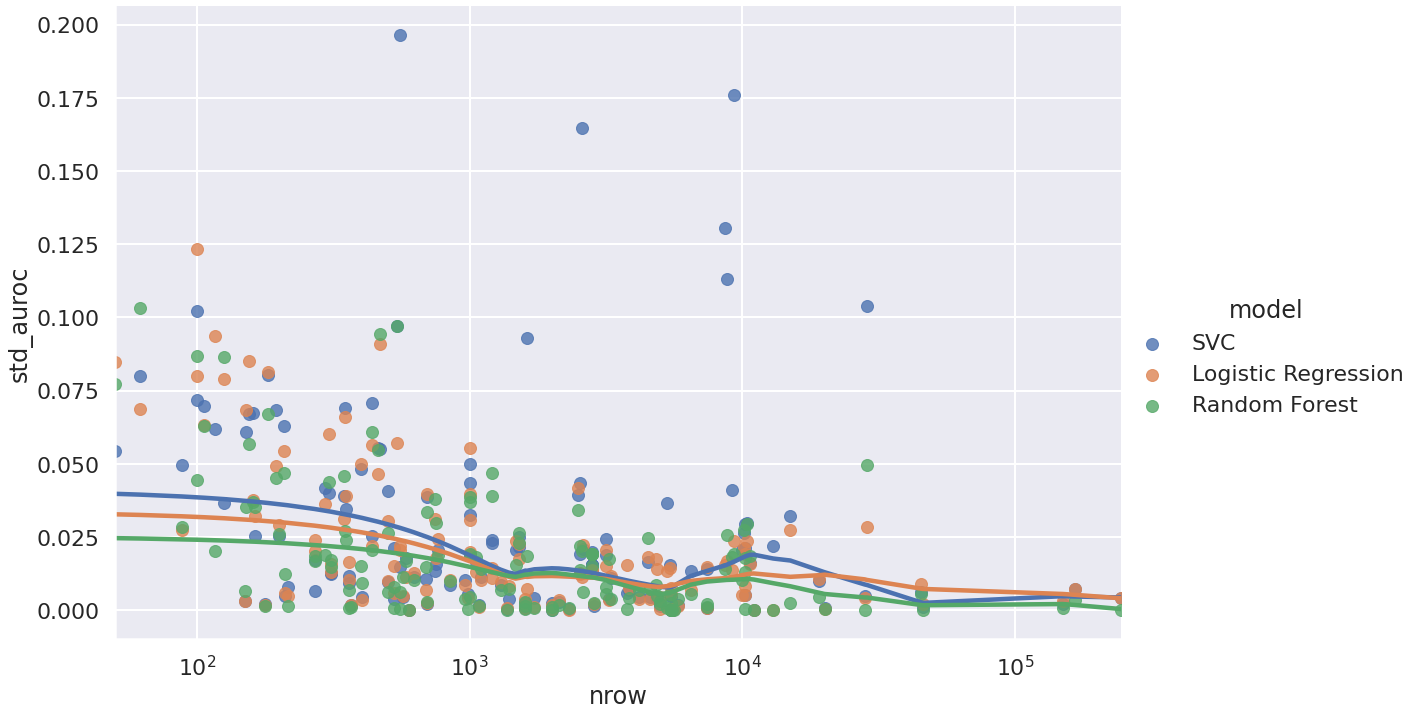

In [7]:
g = sns.lmplot(
    data=results_df,
    x="nrow", y="std_auroc",
    hue="model",
    lowess=True,
    height=10, aspect=1.6
)
g.set(xscale="log")